In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

[*********************100%***********************]  3 of 3 completed


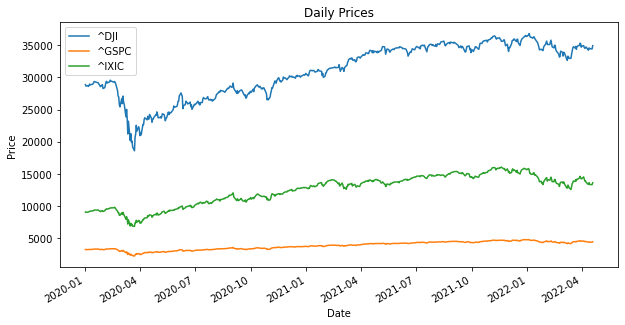

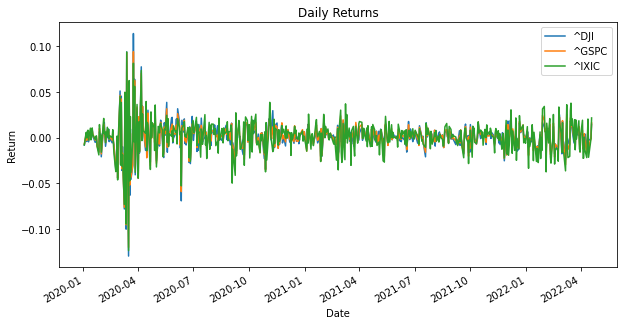

Autocorrelation (DJIA): -0.26330272214531064


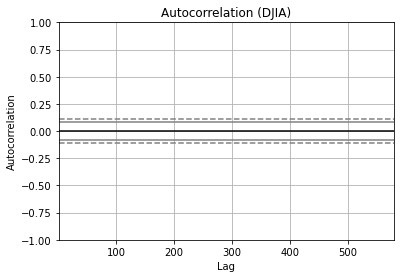

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['^IXIC', '^GSPC', '^DJI']

# '^GSPC is the sp 500
# ^IXIC' is the nasdaq
# DJI is the dow 

# Download daily price data
prices = yf.download(tickers, start='2020-01-01', end='2022-04-20')['Adj Close']

# Plot the prices
prices.plot(figsize=(10, 5))
plt.title('Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate and plot the returns
returns = prices.pct_change()
returns.plot(figsize=(10, 5))
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

# Calculate and plot the autocorrelation for the DJIA
autocorr = returns['^DJI'].autocorr()
print('Autocorrelation (DJIA):', autocorr)
pd.plotting.autocorrelation_plot(returns['^DJI'])
plt.title('Autocorrelation (DJIA)')
plt.show()

[*********************100%***********************]  2 of 2 completed


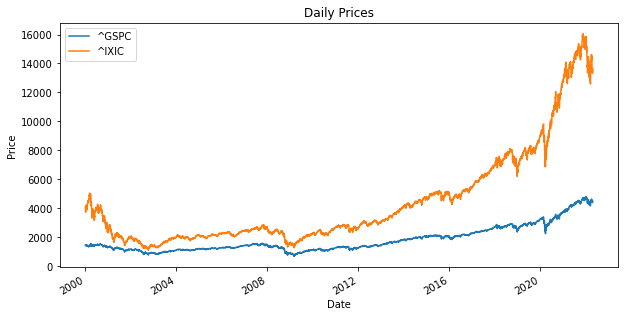

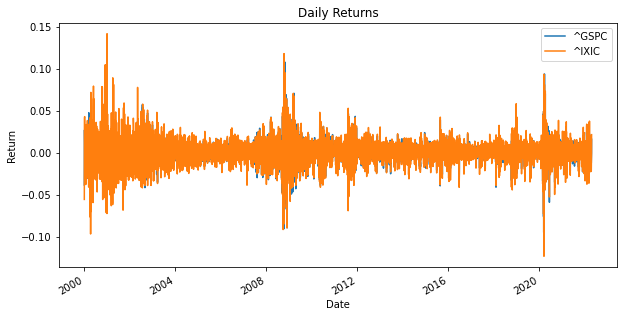

Autocorrelation: -0.06279276403583758


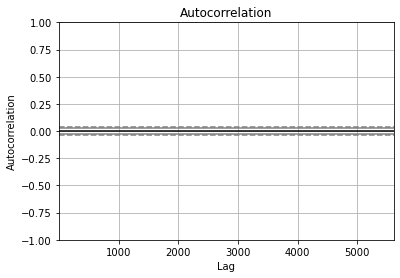

In [30]:


# Define the tickers
tickers = ['^IXIC', '^GSPC',]



# Download daily price data
prices = yf.download(tickers, start='2000-01-01', end='2022-04-20')['Adj Close']

# Plot the prices
prices.plot(figsize=(10, 5))
plt.title('Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate and plot the returns
returns = prices.pct_change()
returns.plot(figsize=(10, 5))
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

# Calculate and plot the autocorrelation
autocorr = returns['^IXIC'].autocorr()
print('Autocorrelation:', autocorr)
pd.plotting.autocorrelation_plot(returns['^IXIC'])
plt.title('Autocorrelation')
plt.show()


In [23]:
data = np.genfromtxt('2021', delimiter=',', names=True)

[*********************100%***********************]  4 of 4 completed
Correlation of AAPL with each market index since 2000:
Nasdaq: nan
S&P 500: nan
Dow Jones: nan


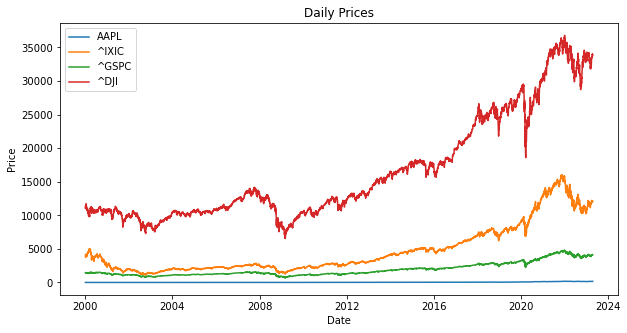

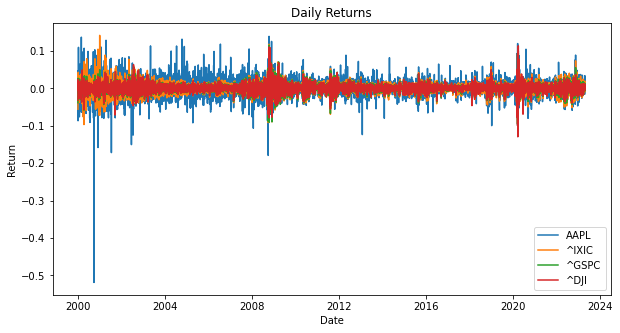

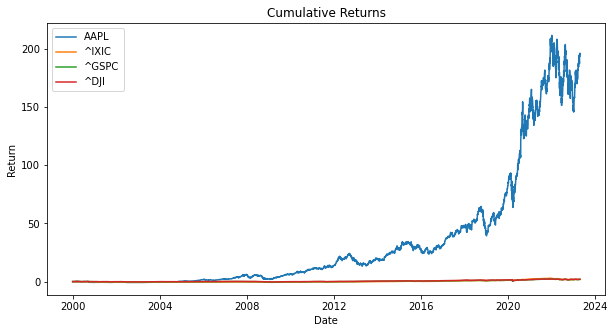

In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['AAPL', '^IXIC', '^GSPC', '^DJI']

# Download historical price data since Jan 1, 2000
prices = yf.download(tickers, start='2000-01-01')['Adj Close']

# Calculate daily returns
returns = prices.pct_change()

# Calculate correlation matrix
corr_matrix = np.corrcoef(returns, rowvar=False)

# Print correlations between AAPL and each market index
print('Correlation of AAPL with each market index since 2000:')
print('Nasdaq:', corr_matrix[0,1])
print('S&P 500:', corr_matrix[0,2])
print('Dow Jones:', corr_matrix[0,3])

# Plot daily prices
plt.figure(figsize=(10, 5))
for ticker in tickers:
    plt.plot(prices.index, prices[ticker], label=ticker)
plt.title('Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot daily returns
plt.figure(figsize=(10, 5))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# Calculate cumulative returns
cum_returns = (1 + returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 5))
for ticker in tickers:
    plt.plot(cum_returns.index, cum_returns[ticker], label=ticker)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()


[*********************100%***********************]  4 of 4 completed
Correlation of AAPL with each market index since 2000:
Nasdaq: 0.5028111667418197
S&P 500: 0.5559115116694907
Dow Jones: 0.6275328940023146


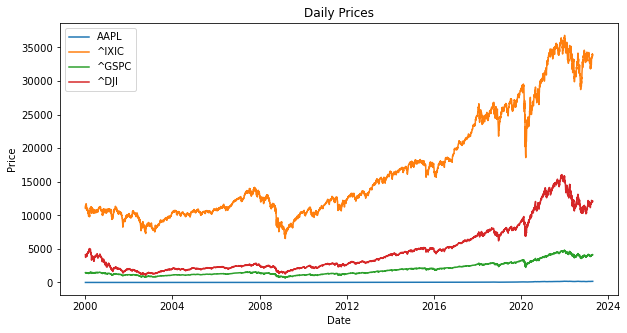

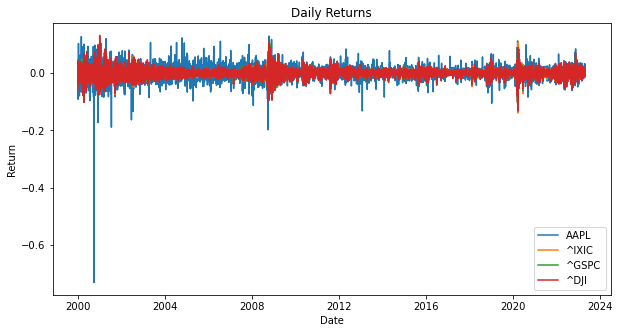

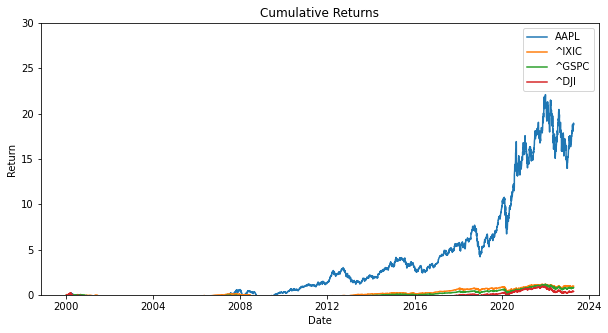

In [50]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['AAPL', '^IXIC', '^GSPC', '^DJI']

# Download historical price data since Jan 1, 2000
prices = yf.download(tickers, start='2000-01-01')['Adj Close']

# Drop any rows with missing data in the prices series
prices = prices.dropna()

# Convert prices to a NumPy array
prices_array = prices.to_numpy()

# Calculate daily returns as a NumPy array
returns_array = np.diff(np.log(prices_array), axis=0)

# Calculate correlation matrix
corr_matrix = np.corrcoef(returns_array, rowvar=False)

# Print correlations between AAPL and each market index
print('Correlation of AAPL with each market index since 2000:')
print('Nasdaq:', corr_matrix[0,1])
print('S&P 500:', corr_matrix[0,2])
print('Dow Jones:', corr_matrix[0,3])

# Plot daily prices
plt.figure(figsize=(10, 5))
for i in range(prices_array.shape[1]):
    plt.plot(prices.index, prices_array[:, i], label=tickers[i])
plt.title('Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot daily returns
plt.figure(figsize=(10, 5))
for i in range(returns_array.shape[1]):
    plt.plot(prices.index[1:], returns_array[:, i], label=tickers[i])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# Calculate cumulative returns
cum_returns_array = np.cumprod(1 + returns_array, axis=0) - 1

# Plot cumulative returns
plt.figure(figsize=(10, 5))
for i in range(cum_returns_array.shape[1]):
    plt.plot(prices.index[1:], cum_returns_array[:, i], label=tickers[i])
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.ylim(0, 30)
plt.legend()
plt.show()


In [52]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['AAPL', '^IXIC', '^GSPC', '^DJI']

# Download historical price data since Jan 1, 2000
prices = yf.download(tickers, start='2000-01-01')['Adj Close']

# Calculate the daily returns for each market index
returns = np.log(prices/prices.shift(1)).dropna()

# Calculate the correlation of AAPL with each market index since 2000
corr_nasdaq = np.corrcoef(returns['AAPL'], returns['^IXIC'])[0,1]
corr_sp500 = np.corrcoef(returns['AAPL'], returns['^GSPC'])[0,1]
corr_dow = np.corrcoef(returns['AAPL'], returns['^DJI'])[0,1]
print(f'Correlation of AAPL with each market index since 2000:\nNasdaq: {corr_nasdaq:.2f}\nS&P 500: {corr_sp500:.2f}\nDow Jones: {corr_dow:.2f}')

# Plot the time series of AAPL and each market index
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(prices.index, prices['AAPL'], label='AAPL')
ax.plot(prices.index, prices['^IXIC'], label='Nasdaq')
ax.plot(prices.index, prices['^GSPC'], label='S&P 500')
ax.plot(prices.index, prices['^DJI'], label='Dow Jones')
ax.set_title('Time Series of Market Indices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()
plt.show()

# Calculate the FFT of AAPL
N = len(prices['AAPL'])
T = 1/252 # Daily sampling period in years
y = prices['AAPL'].values
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# Plot the FFT of AAPL
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set_title('FFT of AAPL')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.show()

# Calculate the FFT of each market index
for market in tickers[1:]:
    y = prices[market].values
    yf = np.fft.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

    # Plot the FFT of each market index
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    ax.set_title(f'FFT of {market}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    plt.show()

# Calculate the correlation of the FFTs of AAPL and each market index
corr_fft_nasdaq = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^IXIC'].values)[:N//2]))[0,1]
corr_fft_sp500 = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^GSPC'].values


SyntaxError: EOL while scanning string literal (3894601089.py, line 63)

[*********************100%***********************]  4 of 4 completed
Correlation of AAPL with each market index since 2000:
Nasdaq: 0.63
S&P 500: 0.56
Dow Jones: 0.50


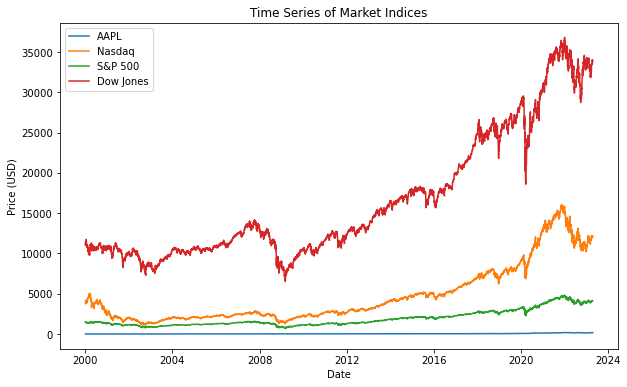

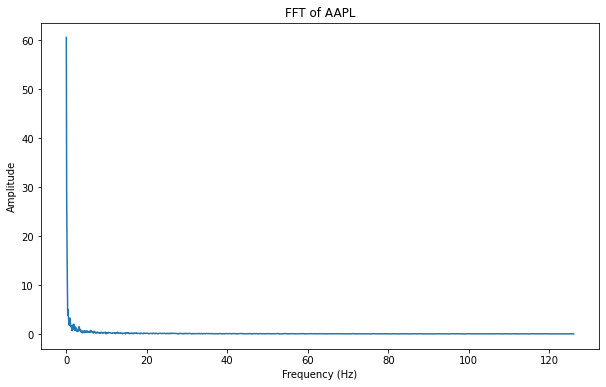

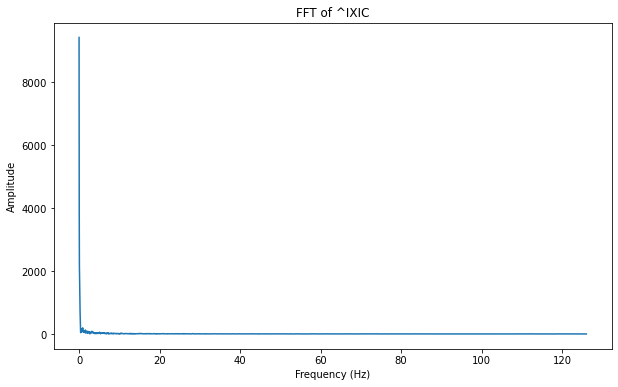

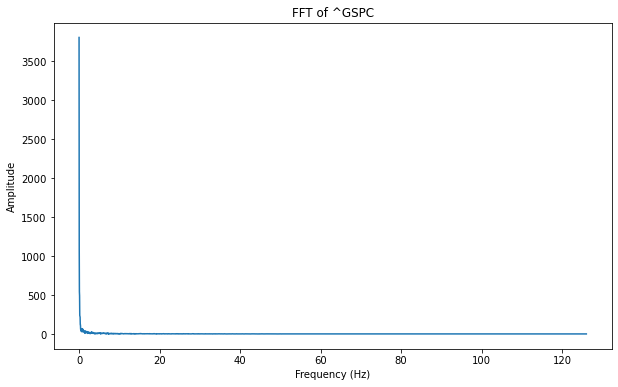

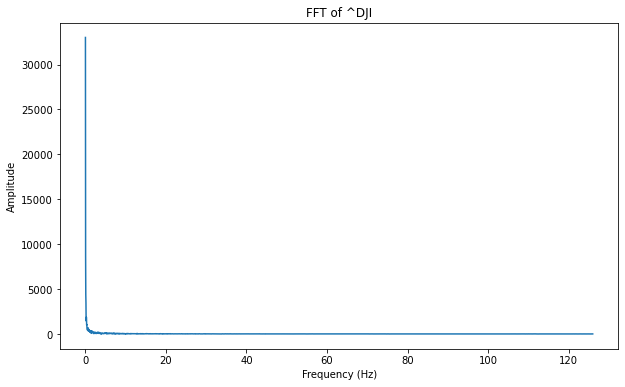

FFT correlation between AAPL and NASDAQ: 0.98
FFT correlation between AAPL and S&P 500: 1.00
FFT correlation between AAPL and Dow Jones: 1.00


In [70]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['AAPL', '^IXIC', '^GSPC', '^DJI']

# Download historical price data since Jan 1, 2000
prices = yf.download(tickers, start='2000-01-01')['Adj Close']

# Calculate the daily returns for each market index
returns = np.log(prices/prices.shift(1)).dropna()

# Calculate the correlation of AAPL with each market index since 2000
corr_nasdaq = np.corrcoef(returns['AAPL'], returns['^IXIC'])[0,1]
corr_sp500 = np.corrcoef(returns['AAPL'], returns['^GSPC'])[0,1]
corr_dow = np.corrcoef(returns['AAPL'], returns['^DJI'])[0,1]
print(f'Correlation of AAPL with each market index since 2000:\nNasdaq: {corr_nasdaq:.2f}\nS&P 500: {corr_sp500:.2f}\nDow Jones: {corr_dow:.2f}')

# Plot the time series of AAPL and each market index
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(prices.index, prices['AAPL'], label='AAPL')
ax.plot(prices.index, prices['^IXIC'], label='Nasdaq')
ax.plot(prices.index, prices['^GSPC'], label='S&P 500')
ax.plot(prices.index, prices['^DJI'], label='Dow Jones')
ax.set_title('Time Series of Market Indices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()
plt.show()

# Calculate the FFT of AAPL
N = len(prices['AAPL'])
T = 1/252 # Daily sampling period in years
y = prices['AAPL'].values
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# Plot the FFT of AAPL
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set_title('FFT of AAPL')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.show()

# Calculate the FFT of each market index
for market in tickers[1:]:
    y = prices[market].values
    yf = np.fft.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

    # Plot the FFT of each market index
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    ax.set_title(f'FFT of {market}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    plt.show()

# Calculate the correlation of the FFTs of AAPL and each market index
corr_fft_nasdaq = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^IXIC'].values)[:N//2]))[0,1]
corr_fft_sp500 = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^GSPC'].values)[:N//2]))[0,1]
corr_fft_dow = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^DJI'].values)[:N//2]))[0,1]

# Print the correlation coefficients
print(f"FFT correlation between AAPL and NASDAQ: {corr_fft_nasdaq:.2f}")
print(f"FFT correlation between AAPL and S&P 500: {corr_fft_sp500:.2f}")
print(f"FFT correlation between AAPL and Dow Jones: {corr_fft_dow:.2f}")



[*********************100%***********************]  4 of 4 completed
AAPL Corr 0.7690606827027396 0.7099209330504506 0.6453783661044419


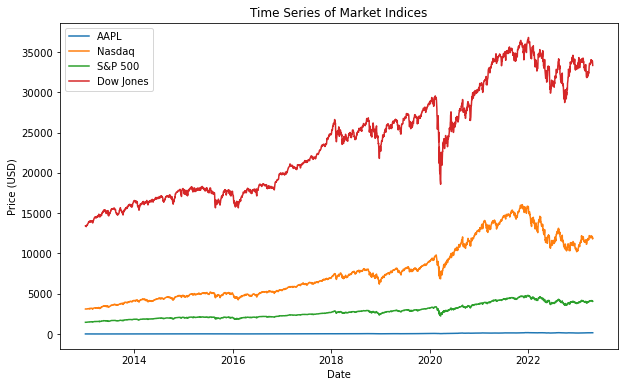

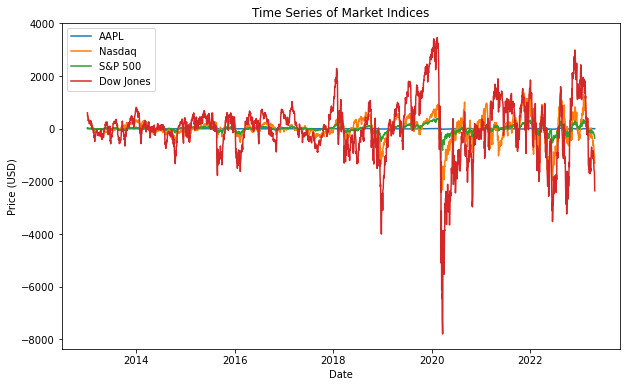

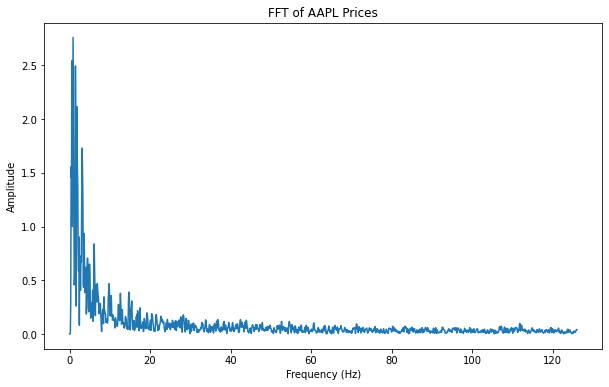

AAPL corr fft 0.8818870205275943 0.8666598251696873 0.7970488473910753


In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def download_prices(tickers, start_date):
    """Download historical price data for a list of tickers
    since a specified start date."""
    return yf.download(tickers, start=start_date)['Adj Close']

def calculate_returns(prices):
    """Calculate the daily log returns of a DataFrame of prices."""
    return np.log(prices/prices.shift(1)).dropna()

def calculate_correlations(returns, asset):
    """Calculate the correlations of an asset's returns with each market index."""
    corr_nasdaq = np.corrcoef(returns[asset], returns['^IXIC'])[0,1]
    corr_sp500 = np.corrcoef(returns[asset], returns['^GSPC'])[0,1]
    corr_dow = np.corrcoef(returns[asset], returns['^DJI'])[0,1]
    return corr_nasdaq, corr_sp500, corr_dow

def plot_prices(prices, ticker):
    """Plot the time series of a DataFrame of prices."""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(prices.index, prices[ticker], label=ticker)
    ax.plot(prices.index, prices['^IXIC'], label='Nasdaq')
    ax.plot(prices.index, prices['^GSPC'], label='S&P 500')
    ax.plot(prices.index, prices['^DJI'], label='Dow Jones')
    ax.set_title('Time Series of Market Indices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    plt.show()

    
def calculate_fft(prices, ticker):
    """Calculate the FFT of a DataFrame of prices for a specific ticker."""
    N = len(prices[ticker])
    T = 1/252 # Daily sampling period in years
    y = prices[ticker].values
    yf = np.fft.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return xf, yf

def plot_fft(xf, yf, title):
    """Plot the FFT of a DataFrame of prices."""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(xf, 2.0/len(yf) * np.abs(yf[:len(yf)//2]))
    ax.set_title(title)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    plt.show()

def calculate_fft_correlations(prices, ticker):
    """Calculate the correlation of the FFT of a specific ticker
    with the FFTs of each market index."""
    N = len(prices[ticker])
    T = 1/252 # Daily sampling period in years
    yf = np.fft.fft(prices[ticker].values)
    corr_fft_nasdaq = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^IXIC'].values)[:N//2]))[0,1]
    corr_fft_sp500 = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^GSPC'].values)[:N//2]))[0,1]
    corr_fft_dow = np.corrcoef(np.abs(yf[:N//2]), np.abs(np.fft.fft(prices['^DJI'].values)[:N//2]))[0,1]
    return corr_fft_nasdaq, corr_fft_sp500, corr_fft_dow


def detrend(y):
    """Detrend the data assuming an exponential trend."""
    x = np.arange(len(y))
    p = np.polyfit(x, np.log(y), 1)
    y_detrended = y / np.exp(p[1] + x * p[0])
    return y_detrended



tickers = ['AAPL', '^IXIC', '^GSPC', '^DJI']
start_date = '2013-01-01'

# Download historical price data for Apple and market indices
prices = download_prices(tickers, start_date)

# Calculate the daily log returns of prices
returns = calculate_returns(prices)

# Calculate the correlations of Apple's returns with each market index
corr_nasdaq, corr_sp500, corr_dow = calculate_correlations(returns, 'AAPL')
print('AAPL Corr', corr_nasdaq, corr_sp500, corr_dow)

# Plot the time series of prices
plot_prices(prices, ticker='AAPL')

# Detrend the data using an exponential fit
def detrend(y):
    """Detrend the data assuming an exponential trend."""
    x = np.arange(len(y))
    p = np.polyfit(x, np.log(y), 1)
    y_detrended = y / np.exp(p[1] + x * p[0])
    return y_detrended

def detrend(y, degree=10):
    """Detrend the data assuming a polynomial trend of the given degree."""
    x = np.arange(len(y))
    p = np.polyfit(x, y, degree, rcond=None)
    y_detrended = y - np.polyval(p, x)
    return y_detrended

def detrend_prices(prices, degree):
    """Detrend a DataFrame of prices."""
    prices_detrended = prices.copy()
    for col in prices.columns:
        prices_detrended[col] = detrend(prices[col], degree=degree)
    return prices_detrended

# Detrend the data using an exponential fit
prices_detrended = detrend_prices(prices, degree=10)

# Plot the detrended time series of prices
plot_prices(prices_detrended, ticker='AAPL')


# Calculate the FFT of Apple's prices
xf, yf = calculate_fft(prices_detrended, 'AAPL')

# Plot the FFT of Apple's prices
plot_fft(xf, yf, 'FFT of AAPL Prices')

# Calculate the correlation of the FFT of Apple's prices with each market index
corr_fft_nasdaq, corr_fft_sp500, corr_fft_dow = calculate_fft_correlations(prices_detrended, 'AAPL')
print('AAPL corr fft', corr_fft_nasdaq, corr_fft_sp500, corr_fft_dow)


In [106]:
def plot_pct_change(prices, ticker):
    """Plot the percentage change time series of a DataFrame of prices."""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(prices.index, 100 * (prices[ticker].pct_change().cumsum()), label=ticker)
    ax.plot(prices.index, 100 * (prices['^IXIC'].pct_change().cumsum()), label='Nasdaq')
    ax.plot(prices.index, 100 * (prices['^GSPC'].pct_change().cumsum()), label='S&P 500')
    ax.plot(prices.index, 100 * (prices['^DJI'].pct_change().cumsum()), label='Dow Jones')
    ax.set_title('Time Series of Market Indices')
    ax.set_xlabel('Date')
    ax.set_ylabel('% Change from Start')
    ax.legend()
    plt.show()


In [129]:
import numpy as np
import matplotlib.pyplot as plt

def plot_prices(prices, ticker, smooth_days=None):
    """Plot the time series of a DataFrame of prices with an optional smoothing window."""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    if smooth_days is not None:
        smooth_window = np.ones(smooth_days) / smooth_days
        prices = prices.rolling(smooth_days).mean()[smooth_days - 1:]
        
    ax.plot(prices.index, prices[ticker], label=ticker)
    ax.plot(prices.index, prices['^IXIC'], label='Nasdaq')
    ax.plot(prices.index, prices['^GSPC'], label='S&P 500')
    ax.plot(prices.index, prices['^DJI'], label='Dow Jones')
    
    ax.set_title('Time Series of Market Indices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.legend()
    plt.show()


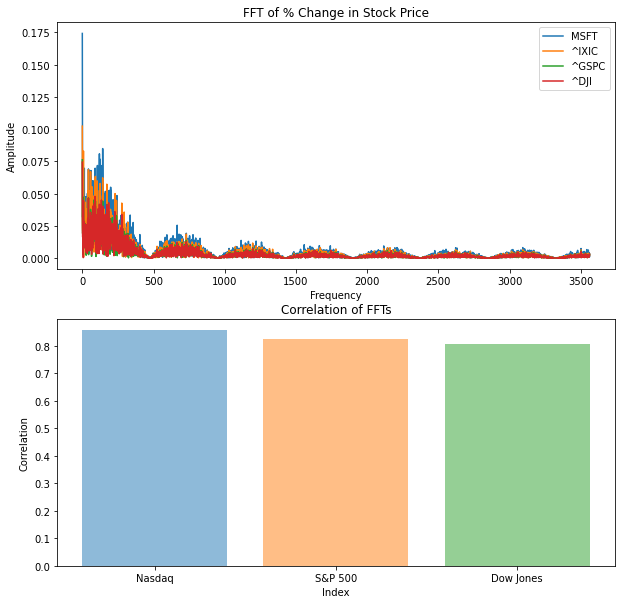

In [128]:
def plot_fft(prices, ticker, smooth_days=None):
    """Plot the FFT of the percent change of a stock's price and the correlation between its FFT and other indices."""
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

    pct_change_ticker = prices[ticker].pct_change().dropna() * 100
    if smooth_days:
        # Use numpy to perform the smoothing
        window = np.ones(smooth_days) / smooth_days
        pct_change_ticker = np.convolve(pct_change_ticker, window, mode='same')
    n_ticker = len(pct_change_ticker)
    T_ticker = 1 / len(pct_change_ticker)
    yf_ticker = np.fft.fft(pct_change_ticker)
    xf_ticker = np.fft.fftfreq(n_ticker, T_ticker)[:n_ticker // 2]
    ax1.plot(xf_ticker, 2.0 / n_ticker * np.abs(yf_ticker[:n_ticker // 2]), label=ticker)

    for i, my_ticker in enumerate(['^IXIC', '^GSPC', '^DJI']):
        pct_change = prices[my_ticker].pct_change().dropna() * 100
        if smooth_days:
            # Use numpy to perform the smoothing
            window = np.ones(smooth_days) / smooth_days
            pct_change = np.convolve(pct_change, window, mode='same')
        n = len(pct_change)
        T = 1 / len(pct_change)
        yf = np.fft.fft(pct_change)
        xf = np.fft.fftfreq(n, T)[:n // 2]
        ax1.plot(xf, 2.0 / n * np.abs(yf[:n // 2]), label=my_ticker)

        corr = np.corrcoef(np.abs(yf_ticker[:n_ticker // 2]), np.abs(yf[:n // 2]))[0][1]
        ax2.bar(i, corr, align='center', alpha=0.5)

    ax1.set_title('FFT of % Change in Stock Price')
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel('Amplitude')
    ax1.legend()

    ax2.set_title('Correlation of FFTs')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Correlation')
    ax2.set_xticks([0, 1, 2])
    ax2.set_xticklabels(['Nasdaq', 'S&P 500', 'Dow Jones'])

    plt.show()

    
fft_cor_smoothed = plot_fft(prices, 'MSFT', smooth_days=15)


[*********************100%***********************]  4 of 4 completed
MSFT Corr 0.747537356589856 0.6847834933883445 0.6330041980821585


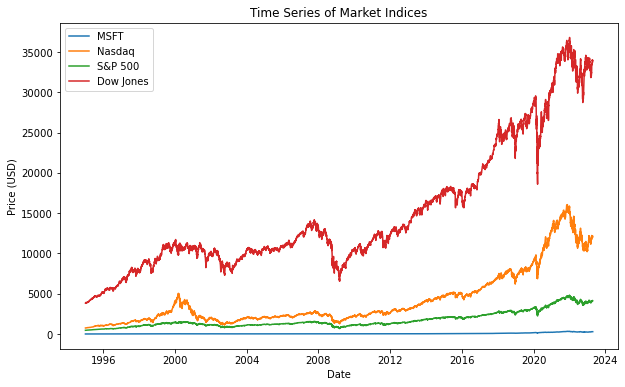

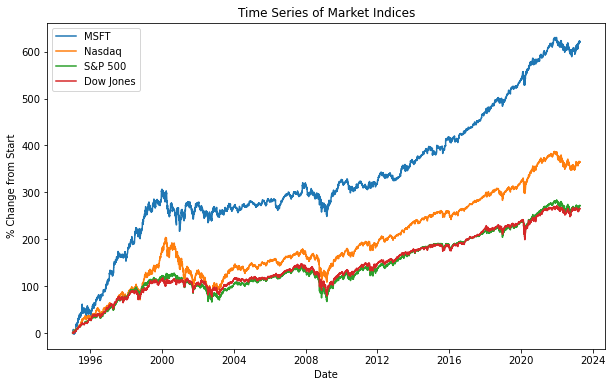

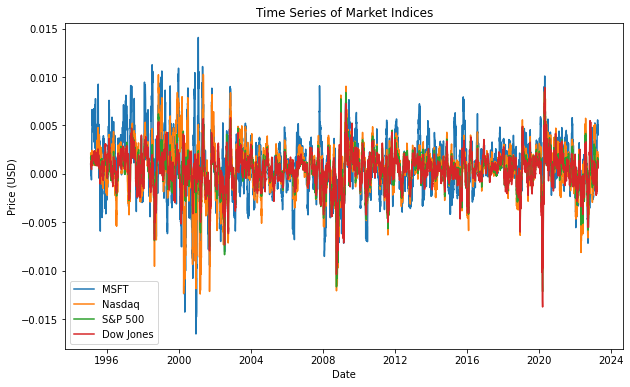

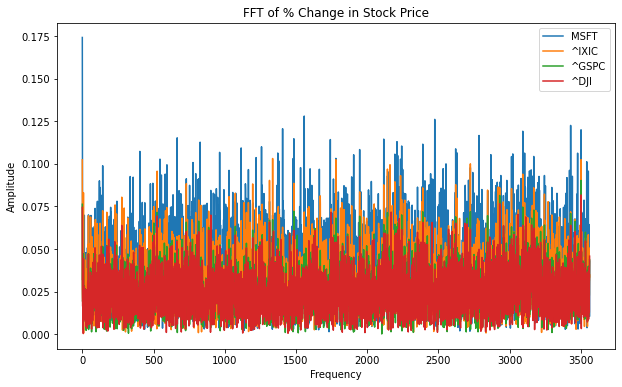

MSFT corr fft {'MSFT': 1.0, '^IXIC': 1.0, '^GSPC': 1.0, '^DJI': 1.0}


In [132]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def download_prices(tickers, start_date):
    """Download historical price data for a list of tickers
    since a specified start date."""
    return yf.download(tickers, start=start_date)['Adj Close']

tickers = ['MSFT', '^IXIC', '^GSPC', '^DJI']
start_date = '1995-01-01'

# Download historical price data for Apple and market indices
prices = download_prices(tickers, start_date)

# Calculate the daily log returns of prices
returns = calculate_returns(prices)

# Calculate the correlations of Apple's returns with each market index
corr_nasdaq, corr_sp500, corr_dow = calculate_correlations(returns, 'MSFT')
print('MSFT Corr', corr_nasdaq, corr_sp500, corr_dow)

# Plot the time series of prices
plot_prices(prices, ticker='MSFT')


# plot % change
prices_pct_change = prices.pct_change()
plot_pct_change(prices, ticker='MSFT', )

plot_prices(prices_pct_change, ticker='MSFT', smooth_days=30)


# Detrend the data using an exponential fit
#prices_detrended = detrend_prices(prices_pct_change, degree=30)



# Detrend the data using an exponential fit
#prices_detrended = detrend_prices(prices, degree=30)

# Plot the detrended time series of prices
#plot_prices(prices_pct_change, ticker='MSFT')

# Calculate the FFT of Apple's prices
xf, yf = calculate_fft(prices_pct_change, 'MSFT')

def plot_fft(prices, ticker):
    """Plot the FFT of the percent change of a stock's price."""
    fig, ax = plt.subplots(figsize=(10, 6))
    correlations = {}
    for my_ticker in [ticker, '^IXIC', '^GSPC', '^DJI']:
        pct_change = prices[my_ticker].pct_change().dropna() * 100
        n = len(pct_change) 
        T = 1 / len(pct_change)
        yf = np.fft.fft(pct_change)
        xf = np.fft.fftfreq(n, T)[:n//2]
        ax.plot(xf, 2.0/n * np.abs(yf[:n//2]), label=my_ticker)
        correlations[my_ticker] = np.corrcoef(np.abs(yf)[:n//2], np.abs(yf[:n//2]))[0,1]
    ax.set_title('FFT of % Change in Stock Price')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')
    ax.legend()
    plt.show()
    return correlations
    
    

# Plot the FFT of Apple's prices
fft_cor = plot_fft(prices, 'MSFT')

# Calculate the correlation of the FFT of Apple's prices with each market index
corr_fft_nasdaq, corr_fft_sp500, corr_fft_dow = calculate_fft_correlations(prices_pct_change, 'MSFT')
print('MSFT corr fft', fft_cor)


[*********************100%***********************]  4 of 4 completed
ENPH Corr 0.3972185057592361 0.35511686574784684 0.3113872873312844


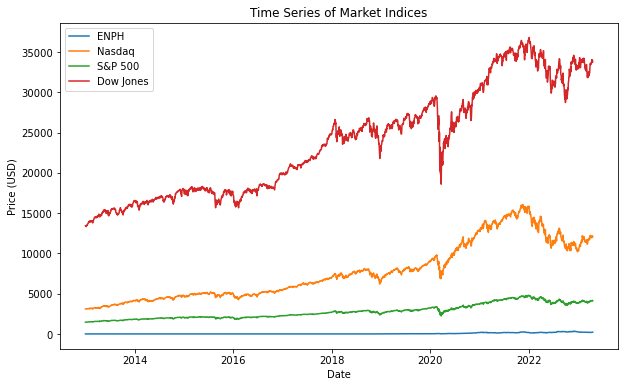

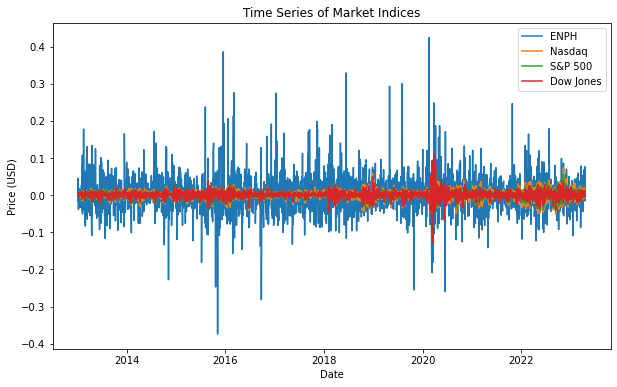


Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.


LinAlgError: SVD did not converge in Linear Least Squares

In [94]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def download_prices(tickers, start_date):
    """Download historical price data for a list of tickers
    since a specified start date."""
    return yf.download(tickers, start=start_date)['Adj Close']

tickers = ['ENPH', '^IXIC', '^GSPC', '^DJI']
start_date = '2013-01-01'

# Download historical price data for Apple and market indices
prices = download_prices(tickers, start_date)

# Calculate the daily log returns of prices
returns = calculate_returns(prices)

# Calculate the correlations of Apple's returns with each market index
corr_nasdaq, corr_sp500, corr_dow = calculate_correlations(returns, 'ENPH')
print('ENPH Corr', corr_nasdaq, corr_sp500, corr_dow)

# Plot the time series of prices
plot_prices(prices, ticker='ENPH')

# plot % change
prices_pct_change = prices.pct_change()
plot_prices(prices_pct_change, ticker='ENPH')


# Detrend the data using an exponential fit
prices_detrended = detrend_prices(prices_pct_change, degree=30)

# Plot the detrended time series of prices
plot_prices(prices_detrended, ticker='ENPH')

# Calculate the FFT of Apple's prices
xf, yf = calculate_fft(prices_detrended, 'ENPH')

# Plot the FFT of Apple's prices
plot_fft(xf, yf, 'FFT of ENPH Prices')

# Calculate the correlation of the FFT of Apple's prices with each market index
corr_fft_nasdaq, corr_fft_sp500, corr_fft_dow = calculate_fft_correlations(prices_detrended, 'ENPH')
print('ENPH corr fft', corr_fft_nasdaq, corr_fft_sp500, corr_fft_dow)
